## File handling and other OS interactions

·	Creating and Opening a File

·	Reading from a file, writing to a file ( variations )

·	Closing a File

·	Handling csv files

·	Handling data from files


##  Creating and Opening a File

## Opening Files in Python
Python has a built-in open() function to open a file. This function returns a file object, also called a handle, as it is used to read or modify the file accordingly.

In [1]:
f = open("test.txt")    # open file in current directory
#f = open("C:/Python38/README.txt")  # specifying full path
f

<_io.TextIOWrapper name='test.txt' mode='r' encoding='UTF-8'>

We can specify the mode while opening a file. In mode, we specify whether we want to read r, write w or append a to the file. We can also specify if we want to open the file in text mode or binary mode.

The default is reading in text mode. In this mode, we get strings when reading from the file.

On the other hand, binary mode returns bytes and this is the mode to be used when dealing with non-text files like images or executable files.

In [3]:
f = open("test.txt")      # equivalent to 'r' or 'rt'
f = open("test.txt",'w')  # write in text mode
f = open("img.bmp",'r+b') # read and write in binary mode

In [4]:
f

<_io.BufferedRandom name='img.bmp'>

Unlike other languages, the character a does not imply the number 97 until it is encoded using ASCII (or other equivalent encodings).

Moreover, the default encoding is platform dependent. In windows, it is cp1252 but utf-8 in Linux.

So, we must not also rely on the default encoding or else our code will behave differently in different platforms.

Hence, when working with files in text mode, it is highly recommended to specify the encoding type.

In [5]:
f = open("test.txt", mode='r', encoding='utf-8')

### Closing Files in Python
When we are done with performing operations on the file, we need to properly close the file.

Closing a file will free up the resources that were tied with the file. It is done using the close() method available in Python.

Python has a garbage collector to clean up unreferenced objects but we must not rely on it to close the file.



In [6]:
f = open("test.txt", encoding = 'utf-8')
# perform file operations
f.close()

This method is not entirely safe. If an exception occurs when we are performing some operation with the file, the code exits without closing the file.

A safer way is to use a try...finally block.

In [7]:
try:
   f = open("test.txt", encoding = 'utf-8')
   # perform file operations
finally:
   f.close()

This way, we are guaranteeing that the file is properly closed even if an exception is raised that causes program flow to stop.

The best way to close a file is by using the with statement. This ensures that the file is closed when the block inside the with statement is exited.

We don't need to explicitly call the close() method. It is done internally.

#### Writing to Files in Python
In order to write into a file in Python, we need to open it in write w, append a or exclusive creation x mode.

We need to be careful with the w mode, as it will overwrite into the file if it already exists. Due to this, all the previous data are erased.

Writing a string or sequence of bytes (for binary files) is done using the write() method. This method returns the number of characters written to the file.

In [8]:
with open("test.txt",'w',encoding = 'utf-8') as f:
   f.write("my first file\n")
   f.write("This file\n\n")
   f.write("contains three lines\n")

This program will create a new file named test.txt in the current directory if it does not exist. If it does exist, it is overwritten.

## Reading Files in Python
To read a file in Python, we must open the file in reading r mode.

There are various methods available for this purpose. We can use the read(size) method to read in the size number of data. If the size parameter is not specified, it reads and returns up to the end of the file.

We can read the text.txt file we wrote in the above section in the following way:

In [11]:
f = open("test.txt",'r',encoding = 'utf-8')
print(f.read(4))    # read the first 4 data


print(f.read(4))    # read the next 4 data


print(f.read())     # read in the rest till end of file


print(f.read())  # further reading returns empty sting


my f
irst
 file
This file

contains three lines




We can see that the read() method returns a newline as '\n'. Once the end of the file is reached, we get an empty string on further reading.

We can change our current file cursor (position) using the seek() method. Similarly, the tell() method returns our current position (in number of bytes).


In [22]:
f.tell()    # get the current file position


f.seek(0)   # bring file cursor to initial position


print(f.read())  # read the entire file


my first file
This file

contains three lines



We can read a file line-by-line using a for loop. This is both efficient and fast.

In [17]:
for line in f:
...     print(line, end = '')
...


### The close() Method
##### The close() method of a file object flushes any unwritten information and closes the file object, after which no more writing can be done.

Python automatically closes a file when the reference object of a file is reassigned to another file. It is a good practice to use the close() method to close a file.

##### Syntax
fileObject.close();

In [27]:
# Open a file
fo = open("test.txt", "wb")
print ("Name of the file: ", fo.name)

# Close opened file
fo.close()

Name of the file:  test.txt


#### Reading and Writing Files
The file object provides a set of access methods to make our lives easier. We would see how to use read() and write() methods to read and write files.

#### The write() Method
The write() method writes any string to an open file. It is important to note that Python strings can have binary data and not just text.

The write() method does not add a newline character ('\n') to the end of the string −

#### Syntax
fileObject.write(string);

In [28]:
# Open a file
fo = open("test.txt", "w")
fo.write( "Python is a great language.\nYeah its great!!\n")

# Close opend file
fo.close()

###### The read() Method
The read() method reads a string from an open file. It is important to note that Python strings can have binary data. apart from text data.

###### Syntax
fileObject.read([count]);

Here, passed parameter is the number of bytes to be read from the opened file. This method starts reading from the beginning of the file and if count is missing, then it tries to read as much as possible, maybe until the end of file.

In [30]:
# Open a file
fo = open("test.txt", "r+")
str = fo.read(10)
print ("Read String is : ", str)

# Close opened file
fo.close()

Read String is :  Python is 


#### File Positions
The tell() method tells you the current position within the file; in other words, the next read or write will occur at that many bytes from the beginning of the file.

The seek(offset[, from]) method changes the current file position. The offset argument indicates the number of bytes to be moved. The from argument specifies the reference position from where the bytes are to be moved.

If from is set to 0, the beginning of the file is used as the reference position. If it is set to 1, the current position is used as the reference position. If it is set to 2 then the end of the file would be taken as the reference position.

In [31]:
# Open a file
fo = open("test.txt", "r+")
str = fo.read(10)
print ("Read String is : ", str)

# Check current position
position = fo.tell()
print ("Current file position : ", position)

# Reposition pointer at the beginning once again
position = fo.seek(0, 0)
str = fo.read(10)
print ("Again read String is : ", str)

# Close opened file
fo.close()

Read String is :  Python is 
Current file position :  10
Again read String is :  Python is 


### Renaming and Deleting Files
Python os module provides methods that help you perform file-processing operations, such as renaming and deleting files.

To use this module, you need to import it first and then you can call any related functions.

#### The rename() Method
The rename() method takes two arguments, the current filename and the new filename.

#### Syntax
os.rename(current_file_name, new_file_name)

In [33]:
import os

# Rename a file from test1.txt to test2.txt
os.rename( "test.txt", "test1.txt" )

In [34]:
ls

Day_1_module_1_2_3_Introduction_to_Python.ipynb
Expenses01.xlsx
Module_10__Supplementary Topics.ipynb
Module_11__Regular expressions.ipynb
Module_12_Excel_Python_interface.ipynb
Module_13_REST_API_acess.ipynb
Module_1__RPS.ipynb
Module_3__Python basic data structures.ipynb
Module_4__Functions in Python.ipynb
Module_5__Functional Programming.ipynb
Module_6_File handling and other OS interactions.ipynb
Module_7_Modules and functions in Python.ipynb
Module_8__Introduction to OOP.ipynb
Module_9__Exceptions Handling in Python.ipynb
Python Scripting.py
Z_Extra_Python.ipynb
clousre-python.ipynb
customer-status.xlsx
excel-comp-data.xlsx
hello.xlsx
sales-feb-2014.xlsx
sales-funnel.xlsx
sales-jan-2014.xlsx
sales-mar-2014.xlsx
sample-salesv3.xlsx
test1.txt


##### The remove() Method
You can use the remove() method to delete files by supplying the name of the file to be deleted as the argument.

##### Syntax
os.remove(file_name)

In [35]:
import os

# Delete file test2.txt
os.remove("text2.txt")

FileNotFoundError: [Errno 2] No such file or directory: 'text2.txt'

####  Directories in Python
All files are contained within various directories, and Python has no problem handling these too. The os module has several methods that help you create, remove, and change directories.

####  The mkdir() Method
You can use the mkdir() method of the os module to create directories in the current directory. You need to supply an argument to this method, which contains the name of the directory to be created.

####  Syntax
os.mkdir("newdir")

In [36]:
import os

# Create a directory "test"
os.mkdir("test")

In [40]:
#The chdir() Method
#You can use the chdir() method to change the current directory. The chdir() method takes an argument, which is the name of the directory that you want to make the current directory.

#Syntax
#os.chdir("newdir")

import os

# Changing a directory to "/home/newdir"
os.chdir("test")

In [41]:
ls

In [42]:
import os

In [47]:
#The getcwd() method displays the current working directory.
os.getcwd()

'/Users/apple/OneDrive/Python Training/Python_Scripting_RPS'

In [45]:
os.chdir('/Users/apple/OneDrive/Python Training/Python_Scripting_RPS')

In [46]:
ls

Day_1_module_1_2_3_Introduction_to_Python.ipynb
Expenses01.xlsx
Module_10__Supplementary Topics.ipynb
Module_11__Regular expressions.ipynb
Module_12_Excel_Python_interface.ipynb
Module_13_REST_API_acess.ipynb
Module_1__RPS.ipynb
Module_3__Python basic data structures.ipynb
Module_4__Functions in Python.ipynb
Module_5__Functional Programming.ipynb
Module_6_File handling and other OS interactions.ipynb
Module_7_Modules and functions in Python.ipynb
Module_8__Introduction to OOP.ipynb
Module_9__Exceptions Handling in Python.ipynb
Python Scripting.py
Z_Extra_Python.ipynb
clousre-python.ipynb
customer-status.xlsx
excel-comp-data.xlsx
hello.xlsx
sales-feb-2014.xlsx
sales-funnel.xlsx
sales-jan-2014.xlsx
sales-mar-2014.xlsx
sample-salesv3.xlsx
test/
test1.txt


In [48]:
#The rmdir() method deletes the directory, which is passed as an argument in the method.
#os.rmdir('dirname')

os.rmdir("test")

In [49]:
ls

Day_1_module_1_2_3_Introduction_to_Python.ipynb
Expenses01.xlsx
Module_10__Supplementary Topics.ipynb
Module_11__Regular expressions.ipynb
Module_12_Excel_Python_interface.ipynb
Module_13_REST_API_acess.ipynb
Module_1__RPS.ipynb
Module_3__Python basic data structures.ipynb
Module_4__Functions in Python.ipynb
Module_5__Functional Programming.ipynb
Module_6_File handling and other OS interactions.ipynb
Module_7_Modules and functions in Python.ipynb
Module_8__Introduction to OOP.ipynb
Module_9__Exceptions Handling in Python.ipynb
Python Scripting.py
Z_Extra_Python.ipynb
clousre-python.ipynb
customer-status.xlsx
excel-comp-data.xlsx
hello.xlsx
sales-feb-2014.xlsx
sales-funnel.xlsx
sales-jan-2014.xlsx
sales-mar-2014.xlsx
sample-salesv3.xlsx
test1.txt


In [14]:
# read the data from the csv file stored locally
import pandas as pd
df=pd.read_csv("titanic_train.csv", index_col='PassengerId')

In [15]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


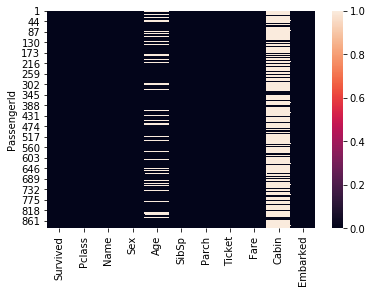

In [19]:
sns.heatmap(df.isnull())

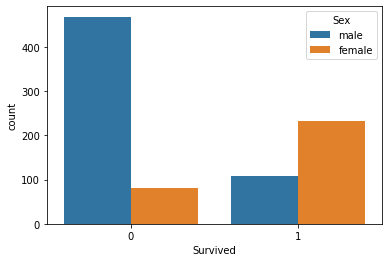

In [20]:
sns.countplot(x='Survived',hue='Sex',data=df)

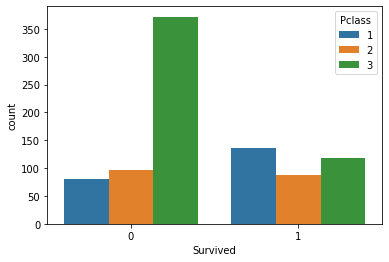

In [21]:
sns.countplot(x='Survived',hue='Pclass',data=df)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [23]:
#create the new dataframe abd assign the varibale to it
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']

In [24]:
y=df['Survived']
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [25]:
X

,sex,age,pclass,sibsp,parch
PassengerId,,,,,
1,male,22.0,3,1,0
2,female,38.0,1,1,0
3,female,26.0,3,0,0
4,female,35.0,1,1,0
5,male,35.0,3,0,0
...,...,...,...,...,...
887,male,27.0,2,0,0
888,female,19.0,1,0,0
889,female,NaN,3,1,2


In [26]:
#using one hot encoding for varibales sex and Pclass
X['sex'] = pd.get_dummies(X.sex)['female']
#Pclass
X = X.join(pd.get_dummies(df.Pclass, prefix='pclass'))
X

,sex,age,pclass,sibsp,parch,pclass_1,pclass_2,pclass_3
PassengerId,,,,,,,,
1,0,22.0,3,1,0,0,0,1
2,1,38.0,1,1,0,1,0,0
3,1,26.0,3,0,0,0,0,1
4,1,35.0,1,1,0,1,0,0
5,0,35.0,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...
887,0,27.0,2,0,0,0,1,0
888,1,19.0,1,0,0,1,0,0
889,1,NaN,3,1,2,0,0,1


In [27]:
X = X.drop(['pclass_1', 'pclass'], axis=1)


In [28]:
#Lets fill all the missing values in age with the average age among the data set 
X['age'] = X['age'].fillna(X['age'].mean())

In [29]:
X['age'].mean()

29.699117647058763